## Trabalho Final - Baseado em Processamento de Linguagem Natural

* A base de dados contém os posts de usuários de twitter, visa analisar o comportamente do usuário da rede social através de suas postagens e classifica-los como positivos, negativos e neutros.

* Este presente trabalho apresenta a etapa de extração dos dados, análise sentimental através do método NLP, e por fim, utilizamos o modelo neural SOM para agrupar os dados e tomar as conclusões.

### Referências
- Base de dados:
https://twitter.com/
https://www.kaggle.com/
https://www.kaggle.com/datasets/tleonel/lula-bolsonaro

- Código de referência:
https://github.com/allysonliveira/MACHINE-LEARNING-TRABALHO-FINAL



In [ ]:
##ETAPA DE CRIAÇÃO DA BASE DE DADOS
#Implementação da mineração das mensagens dos usuários do tweet e para criação de um arquivo .csv

!pip install snscrape
!pip install tweepy

import tweepy
import snscrape.modules.twitter as sntwitter
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
basebruta = pd.read_csv('https://raw.githubusercontent.com/allysonliveira/MACHINE-LEARNING-TRABALHO-FINAL/main/database/tweets_brutos.csv')

basebruta.head( 10 )

,Unnamed: 0,Tweets
0,0,"""teste"""
1,1,RT @WhiteHouse: LIVE: President @realDonaldTru...
2,2,"...love to have Mike Pompeo, Rick Perry, Mick ..."
3,3,...lawyer has already stated that I did nothin...
4,4,The D.C. Wolves and Fake News Media are readin...
5,5,RT @DailyCaller: President @realDonaldTrump si...
6,6,RT @DailyCaller: Adam Schiff Challenger Jennif...
7,7,RT @DailyCaller: The Tide Is Turning Against D...
8,8,RT @DailyCaller: Poll: Independents Flip On Im...
9,9,When the Military rips down an old &amp; badly...


In [ ]:
# passa o Consumer Key e o Consumer Secret
auth = tweepy.OAuthHandler('', '')
# define o token de acesso
# passa o "Access Token" e o "Access Token Secret"
auth.set_access_token('',	'')

# cria um objeto api
api = tweepy.API(auth)

# obtém tweets de um usuário
def obter_tweets(usuario, limite=500):
	resultados = api.user_timeline(screen_name=usuario, count=limite, tweet_mode='extended')
	tweets = [] # lista de tweets inicialmente vazia
	for r in resultados:
		# utiliza expressão regular para remover a URL do tweet
		# http pega o início da url
		# \S+ pega os caracteres não brancos (o final da URL)
		tweet = re.sub(r'http\S+', '', r.full_text)
		tweets.append(tweet.replace('\n', ' ')) # adiciona na lista
	return tweets # retorna a lista de tweets

#Os endereços dos usuários desejados. exemplo: @tweeter, copia apenas o 'tweeter'
usuarios = ['LulaOficial', 'jairbolsonaro', 'CNNBrasil','GloboNews', 'folha']
tweets = []
#Para cada usuário obtém os tweets e armazena na lista tweets.
for u in usuarios:
  aux = obter_tweets(usuario=u , limite=500)
  len(aux)
  for t in aux:
    tweets.append(t)

#Cria uma variável panda
tw = pd.DataFrame({'Tweets' : tweets})

#Salva os tweets em um formato csv
tw.to_csv("tweets_brutos.csv")

In [5]:
##ETAPA DE APLICAÇÃO DO MODELO DE LINGUAGEM NATURAL
!pip install nltk
import nltk
import pandas as pd

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

nltk.download('subjectivity')
nltk.download('vader_lexicon')

n_instances = 1000
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]

[nltk_data] Downloading package subjectivity to /root/nltk_data...
[nltk_data]   Unzipping corpora/subjectivity.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [6]:
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs
sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
len(unigram_feats)

sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
  print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.8
F-measure [subj]: 0.8
Precision [obj]: 0.8
Precision [subj]: 0.8
Recall [obj]: 0.8
Recall [subj]: 0.8


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

dataset = pd.read_csv("https://raw.githubusercontent.com/allysonliveira/MACHINE-LEARNING-TRABALHO-FINAL/main/database/tweets_brutos.csv")
sentences = dataset

In [8]:
sid = SentimentIntensityAnalyzer()

compo = []
negative = []
neutro = []
pos = []

# Monta os dados para gerar o csv
for sentence in sentences:
    ss = sid.polarity_scores(sentence)
    compo.append(ss["compound"])
    negative.append(ss["neg"])
    neutro.append(ss["neu"])
    pos.append(ss["pos"])

# Verifica se todas as listas têm o mesmo comprimento
if len(compo) == len(negative) == len(neutro) == len(pos) == len(sentences):
    # Cria o DataFrame
    tweets_categorizados = pd.DataFrame({'tweets': sentences, 'compound': compo, 'negativos': negative, 'neutro': neutro, 'positivo': pos})
    tweets_categorizados.to_csv("tweets_categorizados.csv", index=False)
else:
    print("As listas não têm o mesmo comprimento.")


As listas não têm o mesmo comprimento.


In [9]:
##ETAPA DE APLICAÇÃO DO MODELO SOM

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#instalando o MiniSOM
!pip install minisom

In [11]:
#Lendo a base de dados
dataset = pd.read_csv('https://raw.githubusercontent.com/allysonliveira/MACHINE-LEARNING-TRABALHO-FINAL/main/database/tweets_categorizados.csv')

dataset.head( 10 )

,Unnamed: 0,tweets,compound,negativos,neutro,positivo
0,0,"""teste""",0.0000,0.000,1.000,0.000
1,1,RT @WhiteHouse: LIVE: President @realDonaldTru...,0.2960,0.000,0.804,0.196
2,2,"...love to have Mike Pompeo, Rick Perry, Mick ...",-0.7177,0.140,0.860,0.000
3,3,...lawyer has already stated that I did nothin...,0.3724,0.000,0.943,0.057
4,4,The D.C. Wolves and Fake News Media are readin...,-0.7269,0.165,0.787,0.048
5,5,RT @DailyCaller: President @realDonaldTrump si...,0.0000,0.000,1.000,0.000
6,6,RT @DailyCaller: Adam Schiff Challenger Jennif...,-0.6249,0.242,0.693,0.065
7,7,RT @DailyCaller: The Tide Is Turning Against D...,0.0000,0.000,1.000,0.000
8,8,RT @DailyCaller: Poll: Independents Flip On Im...,0.0000,0.000,1.000,0.000
9,9,When the Military rips down an old &amp; badly...,0.3707,0.100,0.759,0.141


In [12]:
#coleta de dados necessários tabelados acima
X = dataset.iloc[:,[2,3,4,5]].values


#tamanho da rede
tx = 4
ty = 4

#treinamento do modelo SOM
from minisom import MiniSom
som = MiniSom(x = tx, y = ty, input_len = 4, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000)

#contagem dos negativos, neutros e positivo
negativo = [-0.6229, 1., 0., 0.] #Frase: BAD!!
neutro   = [0., 0., 1., 0.]
positivo = [0.6467, 0., 0., 1.] #Frase: HAPPY!!

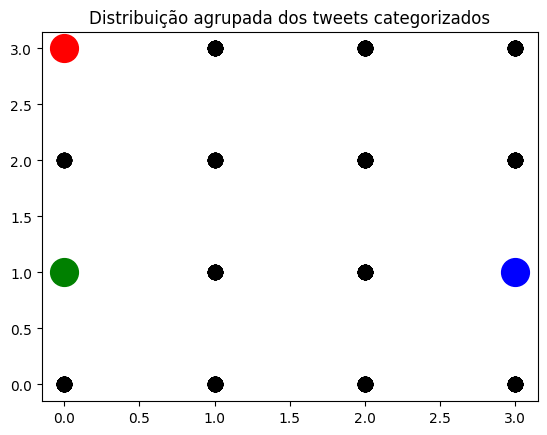

In [13]:
#PLOTAGEM DO GRÁFICO

import matplotlib
import matplotlib.pyplot as plt

# matriz de zeros para o contador de totais
MT = np.zeros((tx,ty))

fig, ax = plt.subplots()
ax.set_title('Distribuição agrupada dos tweets categorizados')

for i in X:
  pos = som.winner(i)
  ax.plot(pos[0], pos[1], 'o' ,color="black", markersize=10)
  MT[pos] += 1

#plota um teeter 100% Positivo
pos = som.winner(positivo)
ax.plot(pos[0], pos[1], 'o' ,color="green", markersize=20)

#plota um tweeter 100% negativo
pos = som.winner(negativo)
ax.plot(pos[0], pos[1], 'o' ,color="red", markersize=20)

#plota um tweeter 100% neutro
pos = som.winner(neutro)
ax.plot(pos[0], pos[1], 'o' ,color="blue", markersize=20 )

plt.show()

In [14]:
print("Total:")
print(MT)

Total:
[[111.  54.  19.  25.]
 [112.  34.  26.  44.]
 [ 99.  51.  59. 105.]
 [ 58. 274.  39.  89.]]


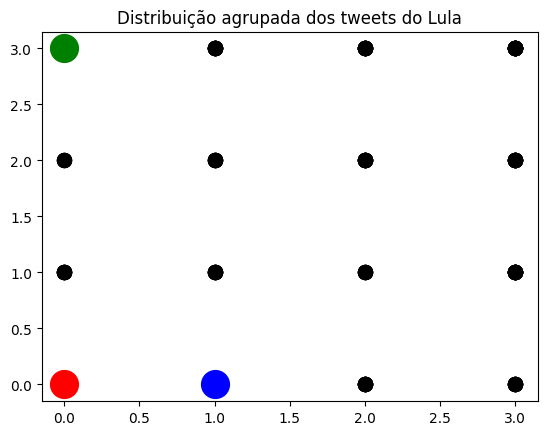

Total lula:
[[145.  84.  31.  41.]
 [152.  52.  42.  75.]
 [131.  66.  80. 131.]
 [ 78. 302.  65. 122.]]


In [16]:
##ANALISES INDIVIDUAIS
#dataset = pd.read_csv('https://raw.githubusercontent.com/allysonliveira/MACHINE-LEARNING-TRABALHO-FINAL/main/database/tweets_bolsonaro_categorizados.csv')
dataset = pd.read_csv('https://raw.githubusercontent.com/allysonliveira/MACHINE-LEARNING-TRABALHO-FINAL/main/database/tweets_lula_categorizados.csv')

#coleta de dados necessários tabelados acima
X = dataset.iloc[:,[2,3,4,5]].values

#tamanho da rede
tx = 4
ty = 4

#treinamento do modelo SOM
from minisom import MiniSom
som = MiniSom(x = tx, y = ty, input_len = 4, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000)

fig, ax = plt.subplots()
ax.set_title('Distribuição agrupada dos tweets do Lula')

for i in X:
  pos = som.winner(i)
  ax.plot(pos[0], pos[1], 'o' ,color="black", markersize=10)
  MT[pos] += 1

#plota um teeter 100% Positivo
pos = som.winner(positivo)
ax.plot(pos[0], pos[1], 'o' ,color="green", markersize=20)

#plota um tweeter 100% negativo
pos = som.winner(negativo)
ax.plot(pos[0], pos[1], 'o' ,color="red", markersize=20)

#plota um tweeter 100% neutro
pos = som.winner(neutro)
ax.plot(pos[0], pos[1], 'o' ,color="blue", markersize=20 )

plt.show()

print("Total lula:")
print(MT)


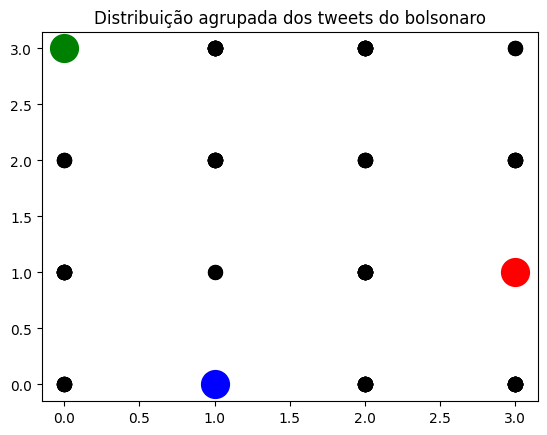

Total bolsonaro:
[[153.  96.  35.  54.]
 [196.  54.  53.  90.]
 [144.  80.  86. 145.]
 [ 94. 305.  73. 125.]]


In [17]:
##ANALISES INDIVIDUAIS
dataset = pd.read_csv('https://raw.githubusercontent.com/allysonliveira/MACHINE-LEARNING-TRABALHO-FINAL/main/database/tweets_bolsonaro_categorizados.csv')
#dataset = pd.read_csv('https://raw.githubusercontent.com/allysonliveira/MACHINE-LEARNING-TRABALHO-FINAL/main/database/tweets_lula_categorizados.csv')

#coleta de dados necessários tabelados acima
X = dataset.iloc[:,[2,3,4,5]].values

#tamanho da rede
tx = 4
ty = 4

#treinamento do modelo SOM
from minisom import MiniSom
som = MiniSom(x = tx, y = ty, input_len = 4, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000)

fig, ax = plt.subplots()
ax.set_title('Distribuição agrupada dos tweets do bolsonaro')

for i in X:
  pos = som.winner(i)
  ax.plot(pos[0], pos[1], 'o' ,color="black", markersize=10)
  MT[pos] += 1

#plota um teeter 100% Positivo
pos = som.winner(positivo)
ax.plot(pos[0], pos[1], 'o' ,color="green", markersize=20)

#plota um tweeter 100% negativo
pos = som.winner(negativo)
ax.plot(pos[0], pos[1], 'o' ,color="red", markersize=20)

#plota um tweeter 100% neutro
pos = som.winner(neutro)
ax.plot(pos[0], pos[1], 'o' ,color="blue", markersize=20 )

plt.show()

print("Total bolsonaro:")
print(MT)
